# Image filtering Khaliq Aghakarimov

## Settings Khaliq Aghakarimov

In [1]:
"we import (=clone) all the data or just update (=pull) them"
import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is created")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..

the directory assets_signal is created
Cloning into 'assets_signal'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 227 (delta 80), reused 188 (delta 41), pack-reused 0
Receiving objects: 100% (227/227), 13.15 MiB | 34.17 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
%reset -f

In [0]:
import numpy as np
import scipy.signal
import  matplotlib.pyplot as plt
import numpy
plt.style.use("default")
#plt.style.use("seaborn")

np.set_printoptions(linewidth=500,suppress=True,precision=5)

## To understand the convolutions Khaliq Aghakarimov

### Convolution by scipy Khaliq Aghakarimov

Convolution are sometimes defined with a + and sometimes with a - :
$$
\Big(image \star mask\Big) [i,j]  = \sum_{di,dj} mask[i \pm di,j \pm dj] \, image[di, dj] 
$$


Create a very small image and a very small mask to check which convention use `scipy`

In [4]:
scipy.signal.convolve

<function scipy.signal.signaltools.convolve>

### Import a true image Khaliq Aghakarimov

In [0]:
baboon = plt.imread("assets_signal/babouin/babouin_moyen.jpg")[:,:,0]

In [6]:
baboon.shape,np.min(baboon),np.max(baboon),baboon.dtype

((328, 273), 0, 255, dtype('uint8'))

In [7]:
baboon=baboon.astype(float)
baboon.dtype

dtype('float64')

* what is the shape of `baboon`. Why?
* what is the range of values. Why?
* what is the `dtype`.
* Convert the values into float. Why it is usefull?

* Plot this image. 
* Add a colorbar with `plt.colorbar();`
* Why the nose is so yellow ?
* Change the colormap with the option `cmap="gray"`


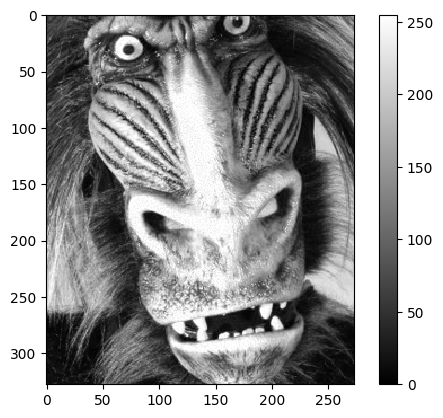

In [8]:
plt.imshow(baboon,cmap="gray");
plt.colorbar();

* Rotate the image of 90 degree. 

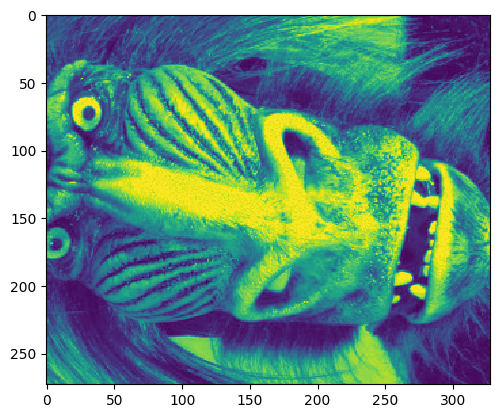

In [9]:
plt.imshow(baboon.T);

* Reduce the width of the image of one half. 

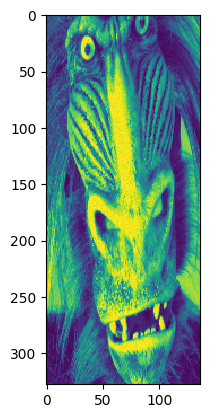

In [10]:
plt.imshow(baboon[:,::2]);

* Make a vertical bluring with a convolution
* Try the 3 differents mode: "valid", "same", "full". Look at the border-effects. 

In [11]:
size=51
mask=np.ones([size,1])/size
print(mask)

[[0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]
 [0.01961]]


In [12]:
img_blur=scipy.signal.convolve(baboon,mask,mode="valid")
img_blur.shape

(278, 273)

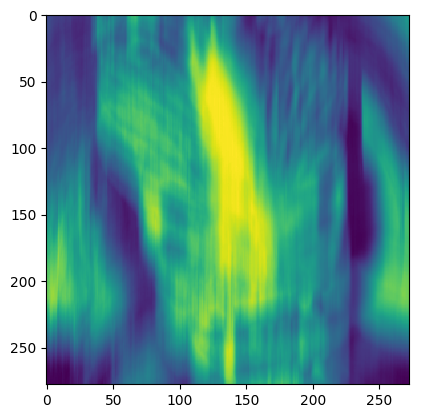

In [13]:
plt.imshow(img_blur);

## Denoising Khaliq Aghakarimov

### Gaussian mask Khaliq Aghakarimov

A good mask to smooth an image is the gaussian mask: a discretisation of the gaussian density. This produice a moving-average, where the close pixels are more important than the far ones.

In [0]:
def gaussian_mask(shape=(3, 3), sigma=0.5):

    if len(shape)!=2: raise ValueError("len-2 shape required")
    if shape[0]%2!=1 or shape[1]%2!=1: raise ValueError("only odd sizes are OK")

    m,n = (shape[0]-1)/2,(shape[1]-1)/2
    y,x = np.ogrid[-m:m+1,-n:n+1]
    res = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )

    
    """normalization"""
    res/=res.sum()
    return res

In [31]:
print(gaussian_mask((11, 11)))

[[0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.00003 0.00021 0.00003 0.      0.      0.      0.     ]
 [0.      0.      0.      0.00003 0.01133 0.08373 0.01133 0.00003 0.      0.      0.     ]
 [0.      0.      0.      0.00021 0.08373 0.61869 0.08373 0.00021 0.      0.      0.     ]
 [0.      0.      0.      0.00003 0.01133 0.08373 0.01133 0.00003 0.      0.      0.     ]
 [0.      0.      0.      0.      0.00003 0.00021 0.00003 0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]

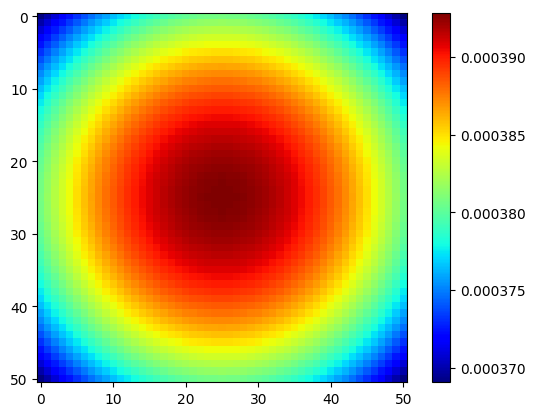

In [33]:
plt.imshow((gaussian_mask(shape=(51, 51),sigma=100)),cmap="jet");
plt.colorbar()

### Adding gaussian noise Khaliq Aghakarimov

* Add a gaussian noise to your image. Help: use: 

      np.random.normal(scale=...,size=(...))

The size is the shape of the random array you want to produce.

The scale (= standart deviation) rules the 'amplitude' of your random variables. 


* Denoise your image with the gaussiant mask given in the previous cell. 



In [0]:
baboon_noise=baboon+np.random.normal(loc=0,scale=20,size=baboon.shape)

In [0]:
gaussian=gaussian_mask(shape=(51, 51),sigma=100)
baboon_denoise=scipy.signal.convolve(baboon_noise,gaussian)

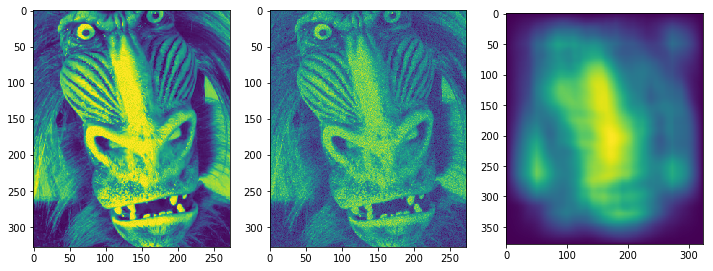

In [0]:
fig,axs=plt.subplots(1,3,figsize=(12,5))

axs[0].imshow(baboon)
axs[1].imshow(baboon_noise)
axs[2].imshow(baboon_denoise);

In [0]:
random=np.random.random(baboon.shape)
random.shape
print(random[:10,:10])

[[0.17324 0.4682  0.91973 0.00209 0.41308 0.84291 0.15539 0.99532 0.43715 0.08868]
 [0.41648 0.27317 0.01704 0.08438 0.69048 0.32612 0.62381 0.65337 0.49386 0.95199]
 [0.05031 0.45213 0.88844 0.82601 0.52638 0.48738 0.39327 0.95025 0.62746 0.16676]
 [0.34663 0.03271 0.40783 0.98665 0.94928 0.80515 0.45169 0.53919 0.2202  0.32806]
 [0.0327  0.20816 0.89166 0.10371 0.76313 0.50656 0.69018 0.05008 0.38348 0.67601]
 [0.7077  0.45775 0.38927 0.36427 0.40235 0.18672 0.21972 0.81855 0.40634 0.8996 ]
 [0.90581 0.82643 0.89083 0.5561  0.20646 0.87024 0.14062 0.51016 0.76942 0.74449]
 [0.51653 0.38175 0.49822 0.47693 0.67413 0.45124 0.79722 0.90522 0.71979 0.67331]
 [0.80247 0.20062 0.34175 0.62497 0.75125 0.62774 0.87533 0.01864 0.69046 0.37136]
 [0.76671 0.53659 0.13886 0.16232 0.0887  0.08388 0.45101 0.97062 0.96213 0.69453]]


In [0]:
baboon_copy=baboon.copy()
baboon_copy[random>0.9]=0

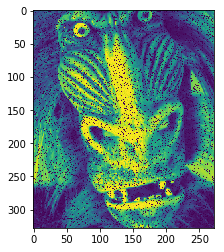

In [0]:
plt.imshow(baboon_copy);

In [0]:
baboon_revover=scipy.signal.medfilt(baboon_copy,kernel_size=3)
baboon_revover.shape

(328, 273)

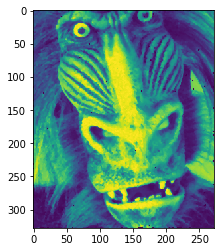

In [0]:
plt.imshow(baboon_revover);

### Adding impultionnal noise Khaliq Aghakarimov

The median filter is perfect to suppress such a noise: You move a rolling window of a given size (ex: $3\times 3$). For each window,  you replace the pixel at the middle  by the median of the pixels of the window. Such a filter is present at two places in `scipy`: 

    scipy.signal.medfilt
    scipy.ndimage.filters.median_filter


* Change randomly some pixel to zero. 

* Denoise your image using the median filter. Try different size for  masks. 



## Edge detection Khaliq Aghakarimov

### The norm of gradients Khaliq Aghakarimov

In [0]:
img_grid = plt.imread("assets_signal/grille.gif")[:,:,0].astype(int)

img_grid.shape,img_grid.dtype,np.max(img_grid)

((256, 256), dtype('int64'), 255)

* Explain what we did on the previous cell. 

Remark we decide here to work with integers. It is perfect for edge detection. 

But we made a dtype conversion. 
* Why ? 


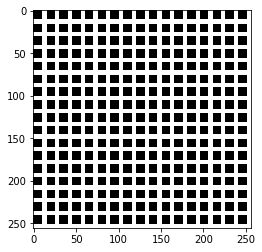

In [0]:
plt.imshow(img_grid, cmap='gray');

* Compute the horizontal and vertical gradients with convolutions



*  Compute and plot the norm of the gradient. Let's denote it by $N$.  

*    Choose a good threshold $S$ and plot the places where $N>S$. You would see the contours appear. 

*  The purpose of this exercise is to emphasize the link between 1D and 2D signals. Plot some vertical and horizontal slices of the grid image, and of these gradients.  Ex: an hozirontal slices of a matrix $M[i,j]$ is $j\to M[i_o,j]$.





In [0]:
Kx=np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])

Ky=np.array(
    [
        [ 1, 2, 1],
        [ 0, 0, 0],
        [-1,-2,-1]
    ])

kx=[[1,-1]]
ky=[[1],[-1]]

Gx = scipy.signal.convolve(img_grid, kx, "same")
Gy = scipy.signal.convolve(img_grid, ky, "same")

Gx.shape,Gy.shape

((256, 256), (256, 256))

In [0]:
N=np.sqrt(Gx**2+Gy**2)
N.shape

(256, 256)

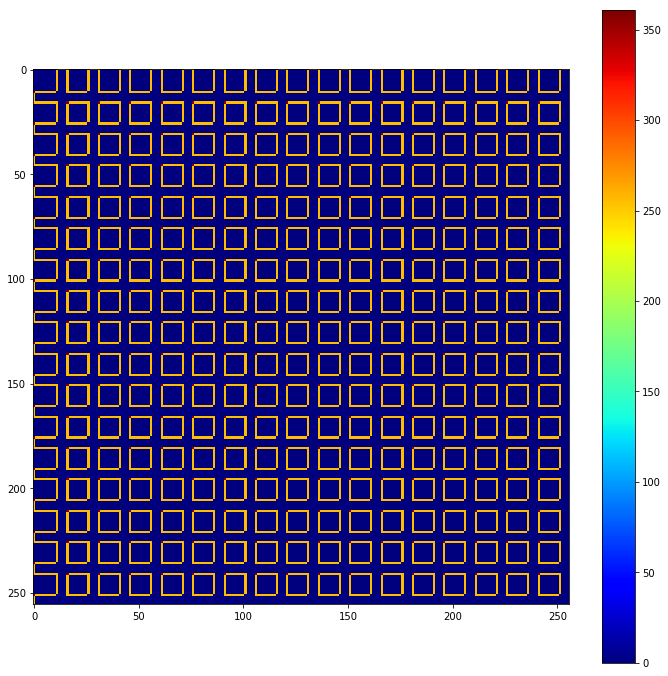

In [0]:
fig,ax=plt.subplots(figsize=(12,12))
res=ax.imshow(N,cmap="jet");
fig.colorbar(res);

In [0]:
print(N[:20,:20].astype(int))

[[  0   0   0   0   0   0   0   0   0   0   0 360 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0   0   0]
 [360 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0 255 255 255 255]
 [25

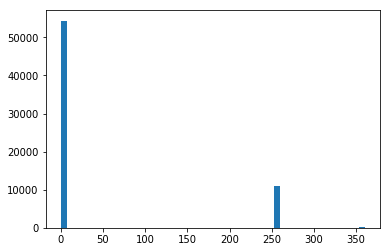

In [0]:
plt.hist(N.flatten(),bins=50);

In [0]:
S=200
contours=(N>S).astype(int)
contours.shape,np.unique(contours)

((256, 256), array([0, 1]))

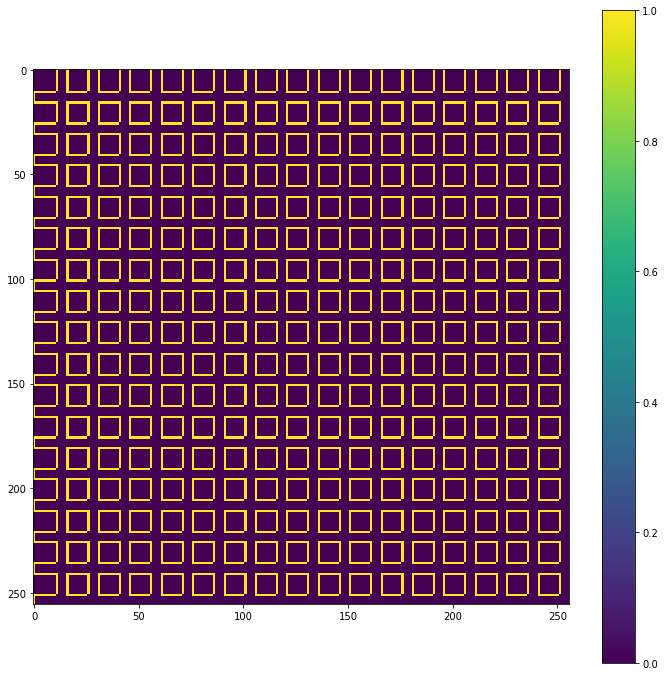

In [0]:
fig,ax=plt.subplots(figsize=(12,12))
res=ax.imshow(contours);
fig.colorbar(res);

### Smoothing before Khaliq Aghakarimov


***To you:*** Try   various gaussian smoothing before the previous contour detection: you would constast this trade-off:

* Strong smoothing: the detection is robust against the noise, but the contours are thick.

* Weak smoothing: sensibility to the noise, but fine localisation of the contour. 


## Restart with a cartoon Khaliq Aghakarimov

In [0]:
cartoon = plt.imread("assets_signal/dessin.png")
cartoon.shape,cartoon.dtype,np.max(cartoon)
image=cartoon[:,:,0]

In [0]:
Gx=scipy.signal.convolve(image,Kx)
Gy=scipy.signal.convolve(image,Ky)
N=(Gx**2+Gy**2)
N.shape

(455, 547)

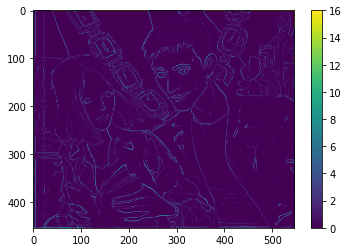

In [0]:
plt.imshow(N)
plt.colorbar();

In [0]:
S=1.5
cont=(N>S).astype(int)
cont.shape

(455, 547)

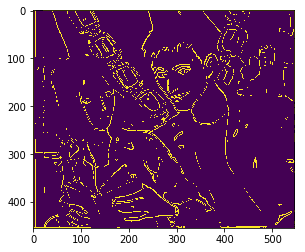

In [0]:
plt.imshow(cont)

* What are the difference ?
* Why there are 4 channels ? 
* What do we have to change ?

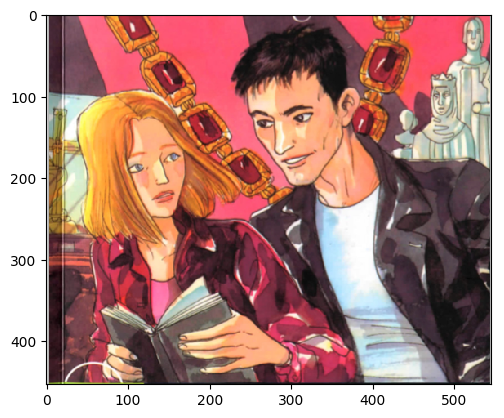

In [0]:
plt.imshow(cartoon);

In [0]:
image=cartoon[:,:,0]
image.shape

(453, 545)

Remake the edge detection with the first channel of the cartoon.

Becareful, the values are not the same. 

Here is a common mistake: 

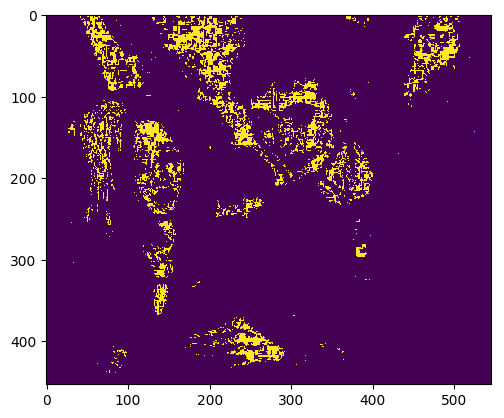

In [0]:
plt.imshow(cartoon[:,:,0].astype(int)); #strange result, why ? 

###  Angles of  gradients Khaliq Aghakarimov

Here is a generated image. 

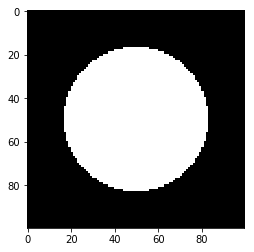

In [0]:
x=np.linspace(-1.5,1.5,100)
xx,yy=np.meshgrid(x,x)
disk= ((xx**2+yy**2)<1).astype(float)

plt.imshow(disk,cmap="gray");

In [0]:
disk+=np.random.uniform(0,1,size=disk.shape)*0.00001

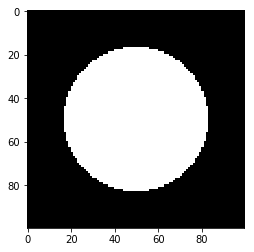

In [0]:
plt.imshow(disk,cmap="gray")

In [0]:
Gx=scipy.signal.convolve(disk,Kx)
Gy=scipy.signal.convolve(disk,Ky)
Gx.shape,Gy.shape

((102, 102), (102, 102))

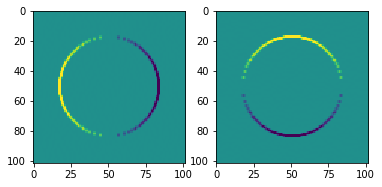

In [0]:
fig,(ax0,ax1)=plt.subplots(1,2)
ax0.imshow(Gx)
ax1.imshow(Gy);

In [0]:
np.min(Gx),np.max(Gx)

(-4.000021827762733, 4.000016098566067)

In [0]:
Gx[np.abs(Gx)<0.0001]=0


In [0]:
Gx.shape

(102, 102)

In [0]:
Gy[np.abs(Gy)<0.0001]=0


In [0]:
angles=np.arctan2(Gy,Gx)
angles.shape

(102, 102)

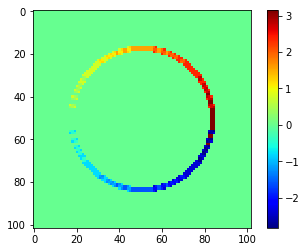

In [0]:
plt.imshow(angles,cmap="jet")
plt.colorbar();

***To you:*** 

*  Find the edge of the disk above. 
*   All allong this edge, compute the angle of the gradient. Help: use `np.arctan2(y,x)`
*   Make a graphical representation of this angles. you can use arrows it is  simpler  to use a colormap. 